In [29]:
import pandas as pd

# CSV file will only be the sample measurements
df = pd.read_csv('../data/detected_contacts.csv')

In [30]:
import numpy as np
import scipy.stats

def confidence_interval(values):
    mean = np.mean(values)
    std_dev = np.std(values)
    n = len(values)
    confidence_level = 0.95
    z_score = scipy.stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    return confidence_interval

In [31]:
import numpy as np

# Descriptive statistics: Mean, median, standard deviation for all quantitative metrics
metrics = ['rssi', 'delay']
functions = ['min', 'max', 'mean', 'median', 'std', confidence_interval]

metrics_df = df[metrics]

results = metrics_df.aggregate(functions)

display(results)

,rssi,delay
min,-65,22.096168
max,-42,69.053477
mean,-47.822222,25.094345
median,-48.0,22.973924
std,4.113663,7.587504
confidence_interval,"(-49.010698759671655, -46.63374568477279)","(22.902242525432378, 27.286447385678734)"


C:\Users\tsbh0\AppData\Local\Temp\ipykernel_13984\531776679.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['minute_bin', 'sender_id']).size().unstack(fill_value=0)


min                                                       0
max                                                       3
mean                                                    2.5
median                                                  3.0
std                                                0.785905
confidence_interval    (2.14716615661049, 2.85283384338951)
dtype: object

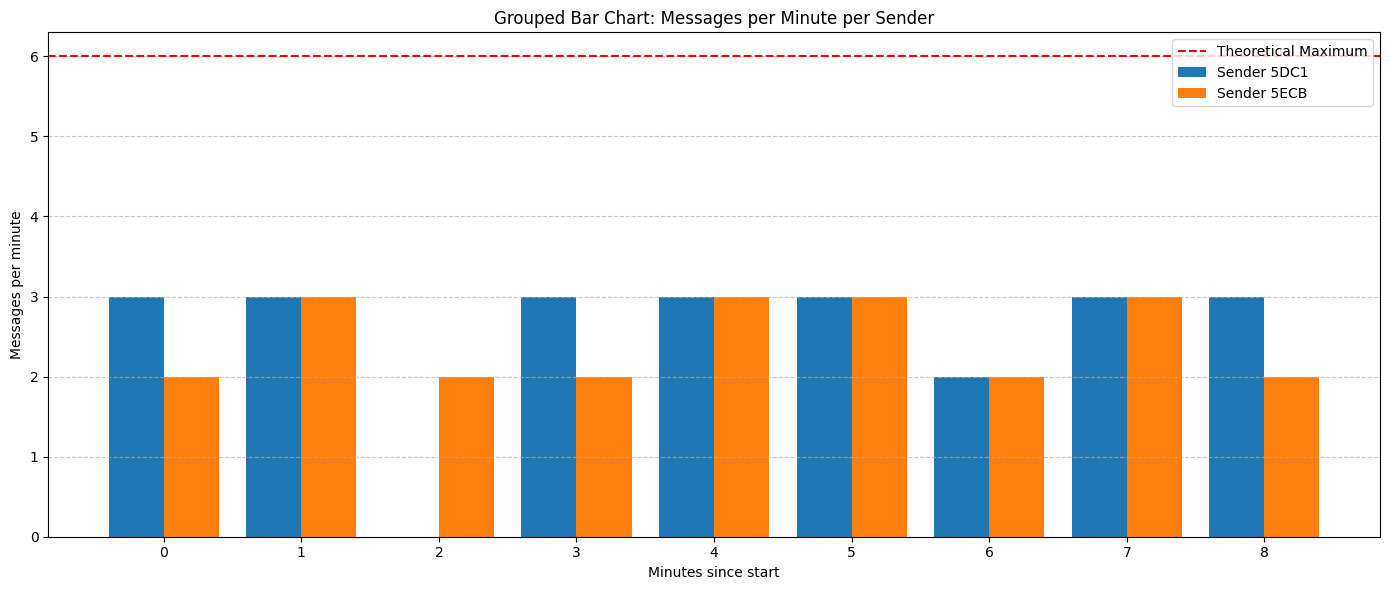

In [32]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np


def get_timestamp(date_string):
    return int(datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').timestamp())

df['server_timestamp'] = df['timestamp'].apply(get_timestamp)
start = df['server_timestamp'].min()
end = df['server_timestamp'].max()

# Create time bins per minute
bins = list(range(start, end + 60, 60))
bin_labels = list(range(len(bins) - 1))

# Bin data and group by sender
df['minute_bin'] = pd.cut(df['server_timestamp'], bins=bins, labels=bin_labels, right=False)

grouped = df.groupby(['minute_bin', 'sender_id']).size().unstack(fill_value=0)

display(pd.Series(grouped.to_numpy().ravel()).aggregate(functions))

# prepare data
x = np.arange(len(grouped.index))
width = 0.8 / len(grouped.columns)

plt.figure(figsize=(14, 6))

# Plot each sender's bar shifted horizontally
for i, sender_id in enumerate(grouped.columns):
    plt.bar(x + i * width, grouped[sender_id], width=width, label=f'Sender {sender_id}')

plt.axhline(y = 6, color = 'red', linestyle='--', label='Theoretical Maximum')
plt.xlabel('Minutes since start')
plt.ylabel('Messages per minute')
plt.title('Grouped Bar Chart: Messages per Minute per Sender')
plt.xticks(x + width * (len(grouped.columns) - 1) / 2, grouped.index.astype(int))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('rssi_vs_distance.csv')

df = df[['rssi', 'distance']].dropna()

df['rssi'] = pd.to_numeric(df['rssi'], errors='coerce')
df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
df = df.dropna()

# Compute Pearson correlation coefficient and p-value
r, p_value = pearsonr(df['rssi'], df['distance'])

# Display results
print(f"Pearson correlation coefficient: {r:.2f}")
print(f"P-value: {p_value:.4e}")
print(f"Result is {'' if p_value < 0.05 else 'not'} statistically significant (alpha = 0.05).")


Pearson correlation coefficient: -0.90
P-value: 3.6151e-12
Result is  statistically significant (alpha = 0.05).
